In [3]:
import tensorflow as tf
import numpy as np

x = np.linspace(-2,2, 20)
def f(x):
  return x * 3.0 + 5.0
y = f(x)


initial_w = 0.1
initial_b = 0.3
class Model(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # In practice, these should be randomly initialized
    self.w = tf.Variable(initial_w)
    self.b = tf.Variable(initial_b)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()



def loss(predicted_y, actual_y):
  return tf.reduce_mean(tf.square(predicted_y - actual_y))

x = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)


def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs),outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)
  return current_loss
  
  
model = Model()

list_w = []
list_b = []
losses = []
for epoch in range(25):
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x, y, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch,model.w.numpy(),model.b.numpy(),current_loss))
  



Epoch  0: w=0.95 b=1.24, loss=34.48368
Epoch  1: w=1.56 b=1.99, loss=20.30217
Epoch  2: w=1.98 b=2.59, loss=12.11430
Epoch  3: w=2.28 b=3.07, loss=7.31589
Epoch  4: w=2.49 b=3.46, loss=4.46468
Epoch  5: w=2.64 b=3.77, loss=2.74922
Epoch  6: w=2.75 b=4.01, loss=1.70569
Epoch  7: w=2.82 b=4.21, loss=1.06488
Epoch  8: w=2.87 b=4.37, loss=0.66821
Epoch  9: w=2.91 b=4.50, loss=0.42103
Epoch 10: w=2.94 b=4.60, loss=0.26617
Epoch 11: w=2.96 b=4.68, loss=0.16871
Epoch 12: w=2.97 b=4.74, loss=0.10716
Epoch 13: w=2.98 b=4.79, loss=0.06818
Epoch 14: w=2.98 b=4.83, loss=0.04343
Epoch 15: w=2.99 b=4.87, loss=0.02770
Epoch 16: w=2.99 b=4.89, loss=0.01768
Epoch 17: w=2.99 b=4.92, loss=0.01129
Epoch 18: w=3.00 b=4.93, loss=0.00721
Epoch 19: w=3.00 b=4.95, loss=0.00461
Epoch 20: w=3.00 b=4.96, loss=0.00295
Epoch 21: w=3.00 b=4.97, loss=0.00188
Epoch 22: w=3.00 b=4.97, loss=0.00121
Epoch 23: w=3.00 b=4.98, loss=0.00077
Epoch 24: w=3.00 b=4.98, loss=0.00049


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


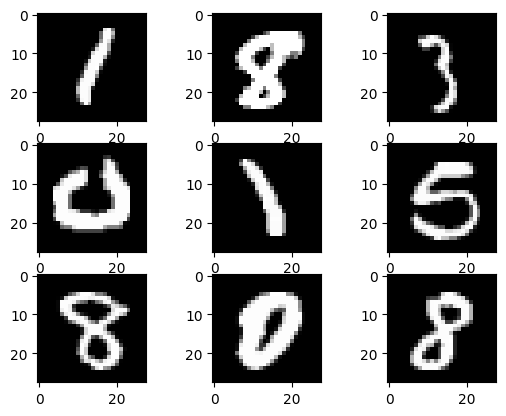

c:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\envs\dung\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,965,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,071,298 (15.53 MB)

 Trainable params: 4,071,298 (15.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 - 91s - 49ms/step - acc: 0.9339 - loss: 1.4335 - val_acc: 0.9676 - val_loss: 0.1259
Epoch 2/3
1875/1875 - 82s - 44ms/step - acc: 0.9736 - loss: 0.1206 - val_acc: 0.9784 - val_loss: 0.1151
Epoch 3/3
1875/1875 - 79s - 42ms/step - acc: 0.9798 - loss: 0.0981 - val_acc: 0.9749 - val_loss: 0.1618
Restoring model weights from the end of the best epoch: 2.


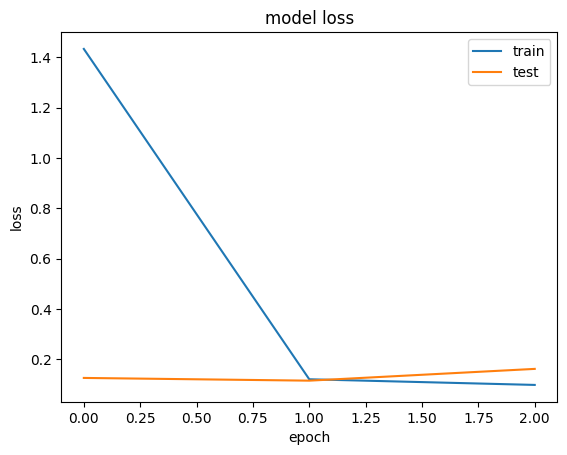

Test loss: 0.11507716029882431
Test accuracy: 0.9783999919891357


In [1]:
# -*- coding: utf-8 -*-
"""CNN_MNIST_Digit.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/19hGUnk_ZSFyHoycV87qE8EDaO-uful12
"""

# Commented out IPython magic to ensure Python compatibility.
import numpy as np
# %matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.cm as cm

"""Loading the MNIST Digits dataset"""

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

no = np.random.randint(low=0, high=59999, size=1)[0]

for i in range(9):
	# define subplot
	no = np.random.randint(low=0, high=59999, size=1)[0]
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[no], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_train.shape

X_test.shape

tf.random.set_seed( seed = 23 )
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28x28
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=1),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=1),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,
                        verbose=2, restore_best_weights=True)
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='sparse_categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x=X_train,y=y_train,
                              validation_data=(X_test,y_test),epochs=3,
                              verbose=2, callbacks=[monitor])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow import keras
keras.utils.plot_model(model, "my_cnn_model.png")


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=15,
                        verbose=2, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(train_generator,
                              validation_data=validation_generator,epochs=20,
                              verbose=2, callbacks=[monitor])
                              

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

loss, acc = model.evaluate(validation_generator, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)




### Inferencing on any image

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(fn)
  
  
print(classes)